In [18]:
import os

os.getcwd()

'/home/cseadmin/undergrad1/dz/GISCUP2021/data_process'

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

link_id_dict={}

def add_to_dict(row):
    global link_id_dict
    
    link_id=row["link_id"]
    link_time=row["link_time"]
    link_cur_status=row["link_current_status"]
    link_arr_status=row["link_arrival_status"]

    if not link_id in link_id_dict:
        link_id_dict[link_id]=[[link_time, [link_cur_status, link_arr_status]]]
    else:
        link_id_dict[link_id].append([link_time, [link_cur_status, link_arr_status]])

In [33]:
n=200000

# with open("../data/train/20200801.txt", "r") as train_data:
#     for _ in range(n):
#         line=train_data.readline().split(";;")
#         if len(line)>1:
#             links=line[1].split(" ")
#             for link in links:
#                 temp=link.split(",")
#                 temp[0]=temp[0].split(":")

#                 link_id=int(temp[0][0])
#                 link_time=float(temp[0][1])
#                 link_cur_status=int(temp[2])
#                 link_arr_status=int(temp[3])

#                 if not link_id in link_id_dict:
#                     link_id_dict[link_id]=[[link_time, [link_cur_status, link_arr_status]]]
#                 else:
#                     link_id_dict[link_id].append([link_time, [link_cur_status, link_arr_status]])

file_number=5
count=0
filenames=os.listdir("../data/train/train_link")[1:] # skip 20200803
for f in filenames:
    df=pd.read_csv(f"../data/train/train_link/{f}")
    df.apply(add_to_dict, axis=1)

    count+=1
    if count>=file_number:
        break

len(link_id_dict)

406856

In [34]:
del_list=[]

for key, value in link_id_dict.items():
    if len(value)<500:
        del_list.append(key)

for key in del_list:
    del link_id_dict[key]

len(link_id_dict)

47273

In [35]:
max_key=-1
max_len=-1

for key, value in link_id_dict.items():
    if len(value)>max_len:
        max_len=len(value)
        max_key=key

max_key, max_len

(420035.0, 6434)

In [36]:
link_id_dict[max_key][:10]

[[14.8114, [1.0, 1.0]],
 [5.1315, [1.0, 0.0]],
 [1.3995, [1.0, 0.0]],
 [24.6857, [1.0, 1.0]],
 [10.1647, [1.0, 1.0]],
 [103.68, [1.0, 2.0]],
 [4.643, [1.0, 0.0]],
 [14.1025, [1.0, 0.0]],
 [12.3429, [1.0, 1.0]],
 [16.7226, [1.0, 1.0]]]

In [37]:
x_time=[]
y_cur_status=[]
y_arr_status=[]

for entry in link_id_dict[max_key]:
    x_time.append(entry[0])
    y_cur_status.append(entry[1][0])
    y_arr_status.append(entry[1][1])

x_time=np.array(x_time)
x_time=x_time.reshape(-1, 1)
;

''

In [38]:
max(y_cur_status)

4.0

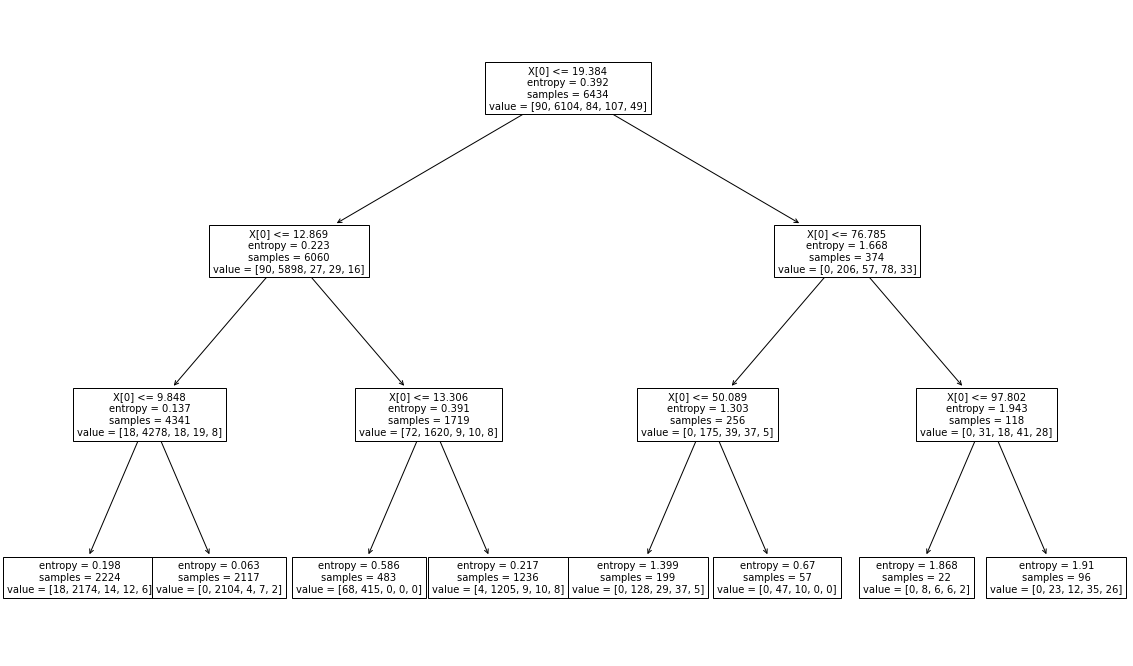

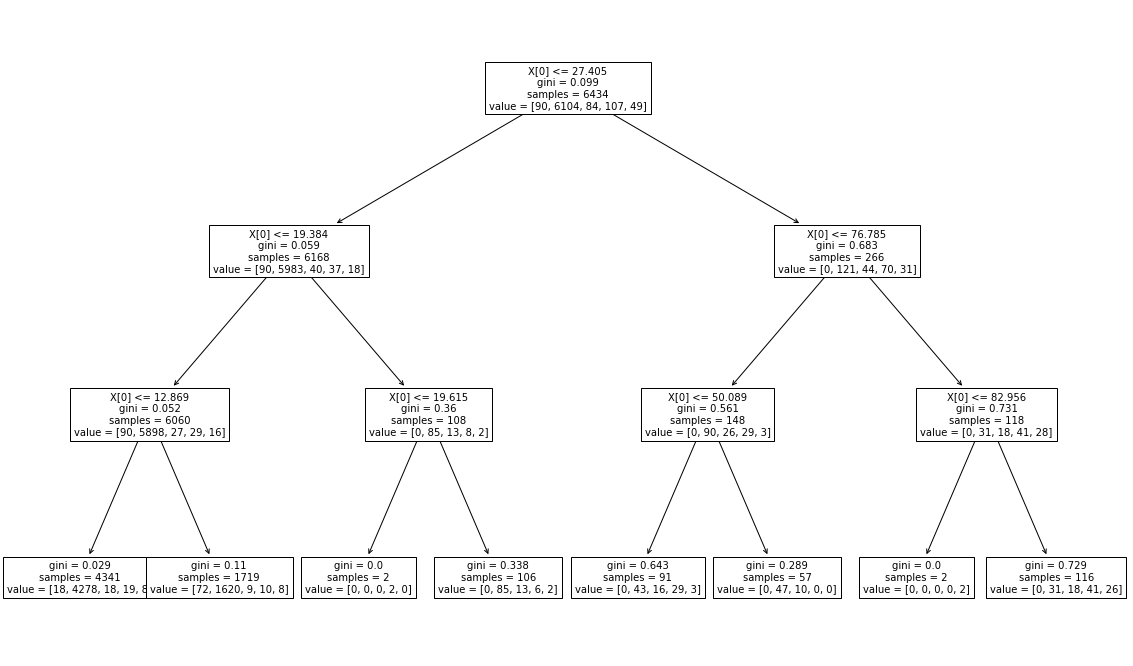

In [39]:
from sklearn import tree

clf=tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf=clf.fit(x_time, y_cur_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

clf=tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
clf=clf.fit(x_time, y_cur_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

plt.show()

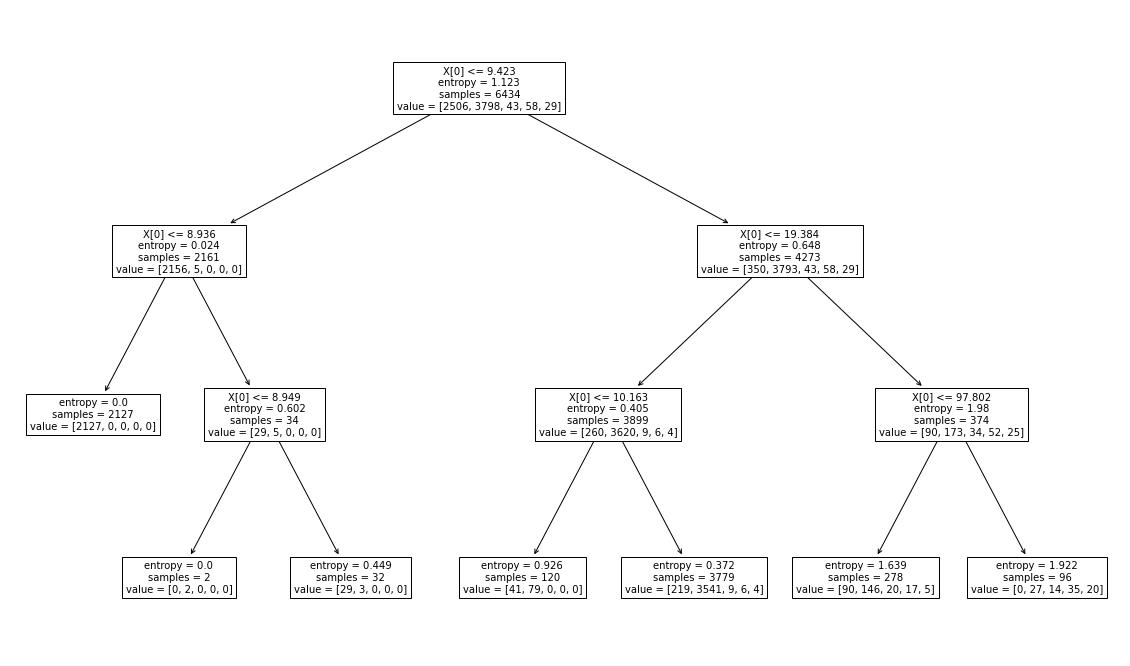

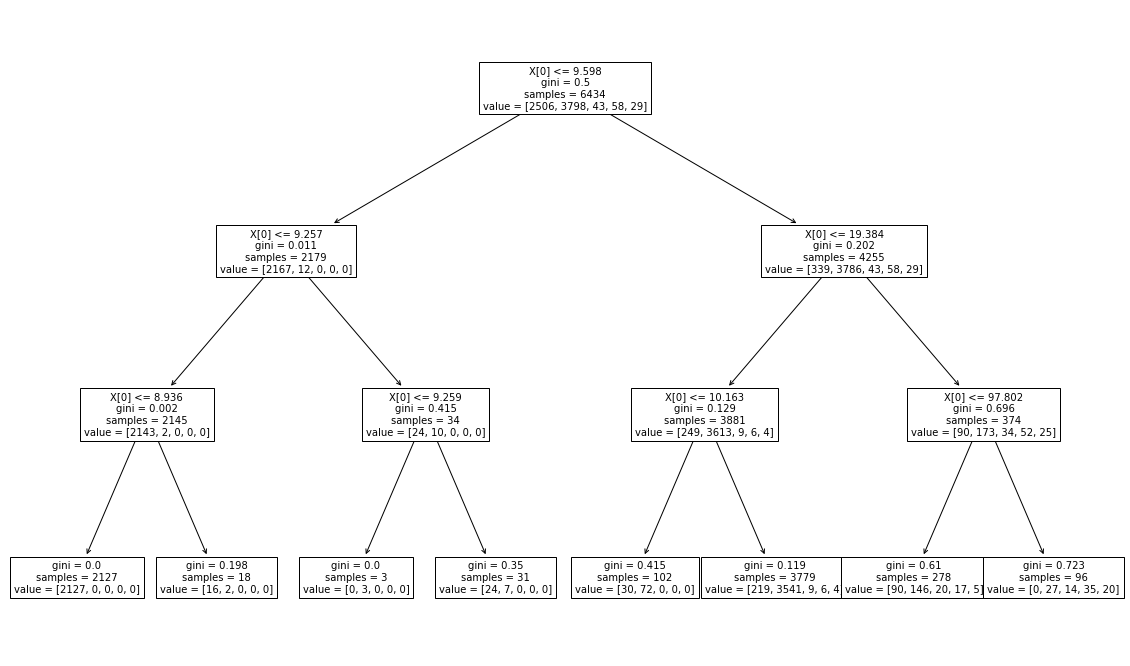

In [40]:
clf=tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf=clf.fit(x_time, y_arr_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

clf=tree.DecisionTreeClassifier(criterion="gini", max_depth=3)
clf=clf.fit(x_time, y_arr_status)

plt.figure(figsize=(20, 12))
tree.plot_tree(clf, fontsize=10)

plt.show()